# Stock Market Analysis Notebook (SMAN) Run Through

You can find this reference notebook [here](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook)

## Objectives

1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks'?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

## List of my questions you can find in the file:

1.) What do the column names - Open, High, Low, Close, Adj Close, Volume - all mean?

## 1.) What was the change in price of the stock over time? 

In [5]:
# pip install packages that aren't already installed
# !pip install pandas_datareader
# !pip install yfinance

# import dependencies
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# for reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf # a means to access the financial data available on Yahoo Finance

# for time stamps
from datetime import datetime

The tech stocks we'll be looking at are:

- Apple (AAPL)
- Google (GOOG)
- Microsoft (MSFT)
- Amazon (AMZN)

In [10]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now() # gives current month, day, year, time

start = datetime(end.year - 1, end.month, end.day) # last year, this month, this day

# for each stock company in the tech list:
for stock in tech_list:
    # globals() is a method that returns a dict with all the global variables and symbols for the current program
    # note that using globals() is a sloppy way of setting the DataFrame names, but its simple
    # set the stock variable of globals to 
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
globals()[stock]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-12 00:00:00-04:00,162.850006,163.376495,161.813995,162.366501,162.366501,36392000
2021-10-13 00:00:00-04:00,163.485504,164.419006,163.054504,164.214005,164.214005,48402000
2021-10-14 00:00:00-04:00,165.122498,165.630005,164.539001,164.992996,164.992996,42190000
2021-10-15 00:00:00-04:00,165.570999,170.520996,165.199997,170.451004,170.451004,103598000
2021-10-18 00:00:00-04:00,169.417999,172.458496,169.255005,172.337006,172.337006,63482000
...,...,...,...,...,...,...
2022-10-06 00:00:00-04:00,120.769997,121.529999,119.500000,120.300003,120.300003,42253800
2022-10-07 00:00:00-04:00,118.000000,118.169998,113.879997,114.559998,114.559998,54626400
2022-10-10 00:00:00-04:00,115.099998,116.250000,112.430000,113.669998,113.669998,42339700


In [12]:
globals()[stock].dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

__Do we know what each of these columns in the dataframe mean?__

In [14]:
# define company list and names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for each company, add the company name to the stock data
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-29 00:00:00-04:00,115.599998,116.070000,113.059998,114.800003,114.800003,58969700,AMAZON
2022-09-30 00:00:00-04:00,114.080002,116.919998,112.839996,113.000000,113.000000,59409800,AMAZON
2022-10-03 00:00:00-04:00,113.580002,116.910004,112.449997,115.879997,115.879997,50941900,AMAZON
2022-10-04 00:00:00-04:00,119.889999,123.000000,119.790001,121.089996,121.089996,62812600,AMAZON
2022-10-05 00:00:00-04:00,118.580002,121.750000,117.690002,120.949997,120.949997,48217500,AMAZON
2022-10-06 00:00:00-04:00,120.769997,121.529999,119.500000,120.300003,120.300003,42253800,AMAZON
2022-10-07 00:00:00-04:00,118.000000,118.169998,113.879997,114.559998,114.559998,54626400,AMAZON
2022-10-10 00:00:00-04:00,115.099998,116.250000,112.430000,113.669998,113.669998,42339700,AMAZON
2022-10-11 00:00:00-04:00,112.709999,115.480003,110.389999,112.209999,112.209999,56432200,AMAZON


In [15]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-12 00:00:00-04:00,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,APPLE
2021-10-13 00:00:00-04:00,141.240005,141.399994,139.199997,140.910004,140.124802,78762700,APPLE
2021-10-14 00:00:00-04:00,142.110001,143.880005,141.509995,143.759995,142.958908,69907100,APPLE
2021-10-15 00:00:00-04:00,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,APPLE
2021-10-18 00:00:00-04:00,143.449997,146.839996,143.160004,146.550003,145.733383,85589200,APPLE


In [17]:
# verify the type
type(AAPL)

pandas.core.frame.DataFrame

In [18]:
# print out the dataframe
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-12 00:00:00-04:00,143.229996,143.250000,141.039993,141.509995,140.721451,73035900,APPLE
2021-10-13 00:00:00-04:00,141.240005,141.399994,139.199997,140.910004,140.124802,78762700,APPLE
2021-10-14 00:00:00-04:00,142.110001,143.880005,141.509995,143.759995,142.958908,69907100,APPLE
2021-10-15 00:00:00-04:00,143.770004,144.899994,143.509995,144.839996,144.032898,67940300,APPLE
2021-10-18 00:00:00-04:00,143.449997,146.839996,143.160004,146.550003,145.733383,85589200,APPLE
...,...,...,...,...,...,...,...
2022-10-06 00:00:00-04:00,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,APPLE
2022-10-07 00:00:00-04:00,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,APPLE
2022-10-10 00:00:00-04:00,140.419998,141.889999,138.570007,140.419998,140.419998,74899000,APPLE


In [30]:
# summary stats
aapl_ss = AAPL.describe()
aapl_ss

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,158.384348,160.479961,156.502925,158.572648,158.177103,8.938085e+07
std,12.467290,12.388011,12.370760,12.372471,12.267759,2.650843e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.809998,150.130005,147.479996,148.960007,148.503723,7.037410e+07
50%,159.570007,161.800003,156.529999,159.220001,158.845657,8.450580e+07
75%,169.080002,171.050003,167.139999,168.880005,168.490005,1.017869e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


In [35]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-10-12 00:00:00-04:00 to 2022-10-12 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


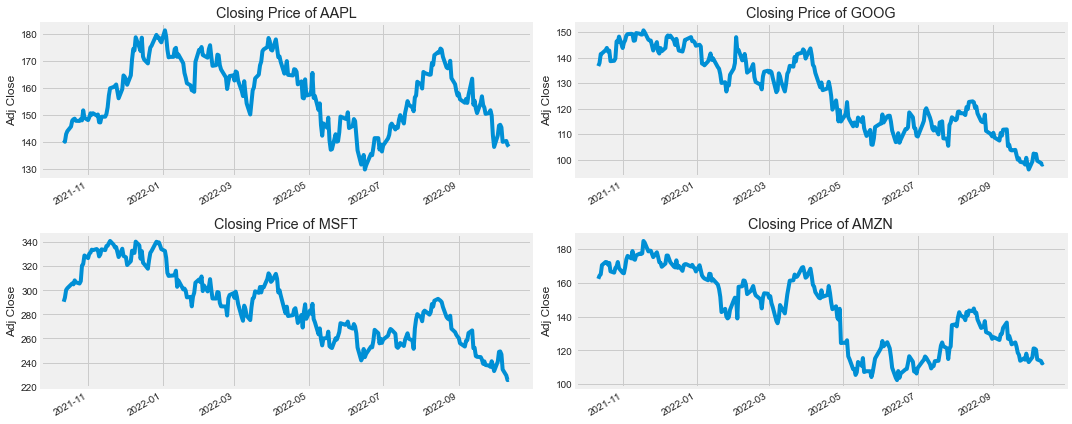

In [36]:
# Let's see a historical view of the closing price

# fig sizes
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

# plot for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # plot the adjusted close on the y-axis
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

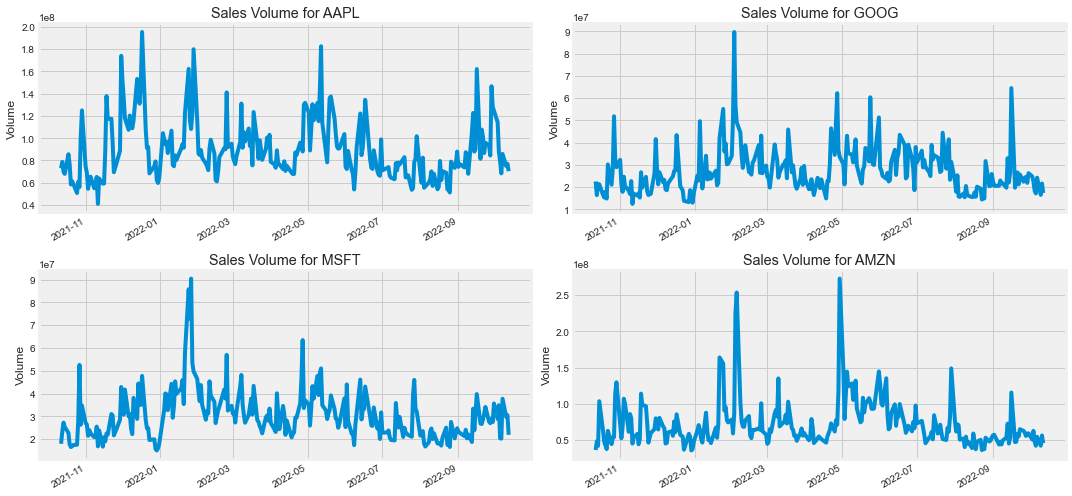

In [37]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

# for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # create a volumne plot on the y-axis
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2.) What was the moving average of the various stocks?